# Data Science Project
This is the notebook that is assosiated with TTDS report, and what wil be used to create all the fancy python graphs\
We first need to import the modules/libaries that we are going to use in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Sets the size for the visulaizations, makes sure they are big enough to be copied into Word
plt.rcParams["figure.figsize"] = (20,10)
print("Imported needed modules!")

Imported needed modules!


Now we want to import the data from the CSV file:

In [2]:
df = pd.read_csv("./Data/traffic_5minutes.csv",delimiter=",")
df.head()

,Date,Records,Bytes,Packets
0,2021/03/28T12:50:00,2.02,131.82,2.32
1,2021/03/28T12:55:00,207.98,963369.18,6577.68
2,2021/03/28T13:00:00,0.00,0.00,0.00
3,2021/03/28T13:05:00,0.00,0.00,0.00
4,2021/03/28T13:10:00,0.00,0.00,0.00


## Data Scanitisation
The data we have is good but the time stamps aren't going to work when it come to the Linear regression. As we are going in 10 Minute chunks we will assume 12:50:00 is 0 and 12:55:00 is 1 and so on. This should make it easier to work with, I will write a small script at the end of this Notebook to help figure it out!

In [3]:
df_time = list(range(0,len(df["Date"])))

## Visualisations
There are a few visulasations that would be really handy to have:
-	bytes over Time
-	Records over Time
-	Packets over Time
-	Packets over bytes
-	Records over bytes

Text(0, 0.5, 'bytes')

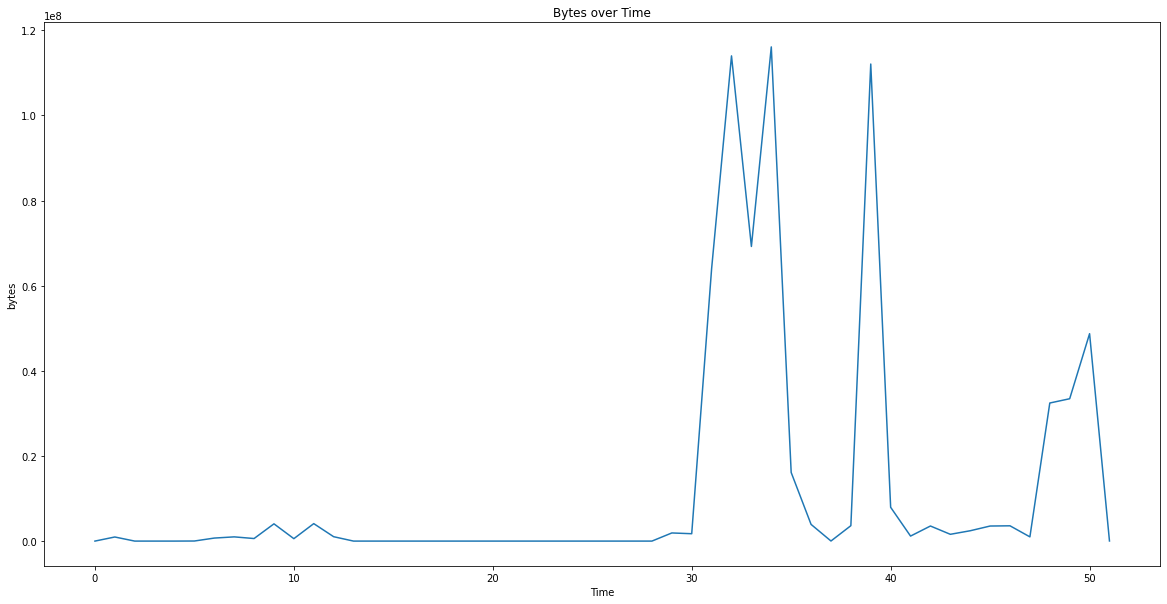

In [4]:
# bytes Over EPHOC Time
plt.plot(df_time,df["Bytes"])
plt.title("Bytes over Time")
plt.xlabel("Time")
plt.ylabel("bytes")

Text(0.5, 1.0, 'Records Over Time')

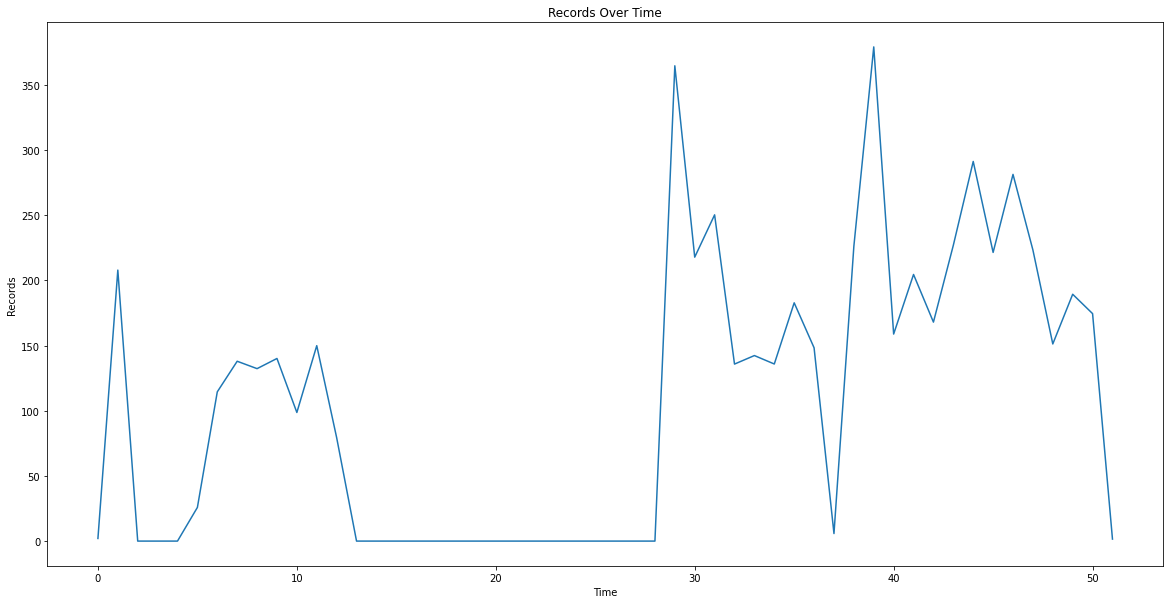

In [5]:
# Records Over Time
plt.plot(df_time,df["Records"])
plt.xlabel("Time")
plt.ylabel("Records")
plt.title("Records Over Time")

Text(0.5, 1.0, 'Packets Over Time')

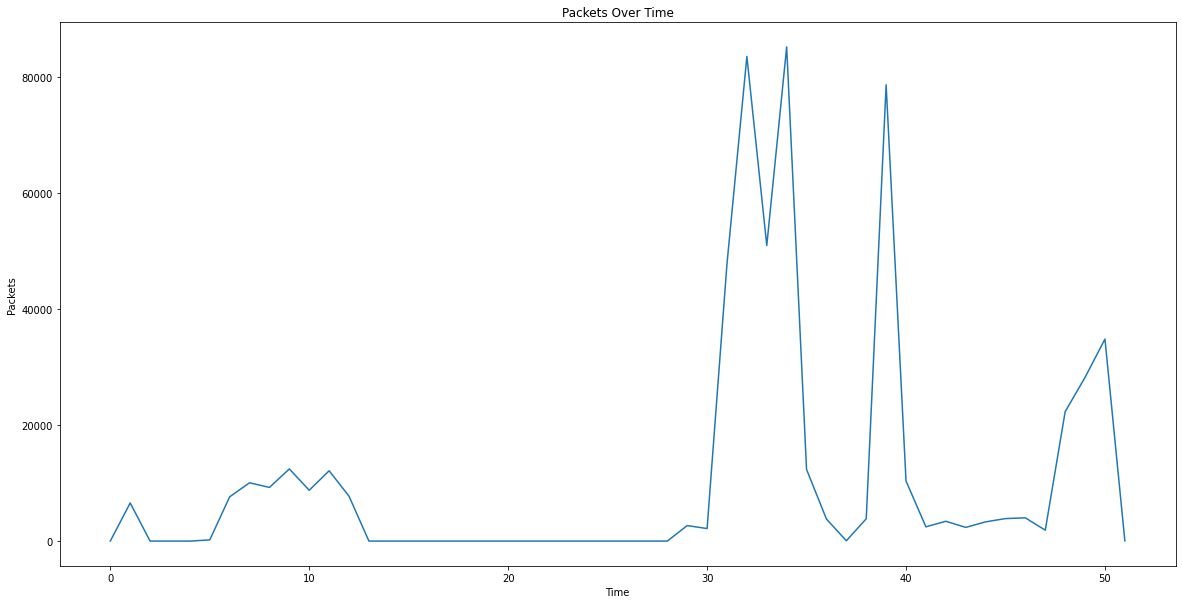

In [6]:
# Packets Over Time
plt.plot(df_time,df["Packets"])
plt.xlabel("Time")
plt.ylabel("Packets")
plt.title("Packets Over Time")

Text(0.5, 1.0, 'Packets Over bytes')

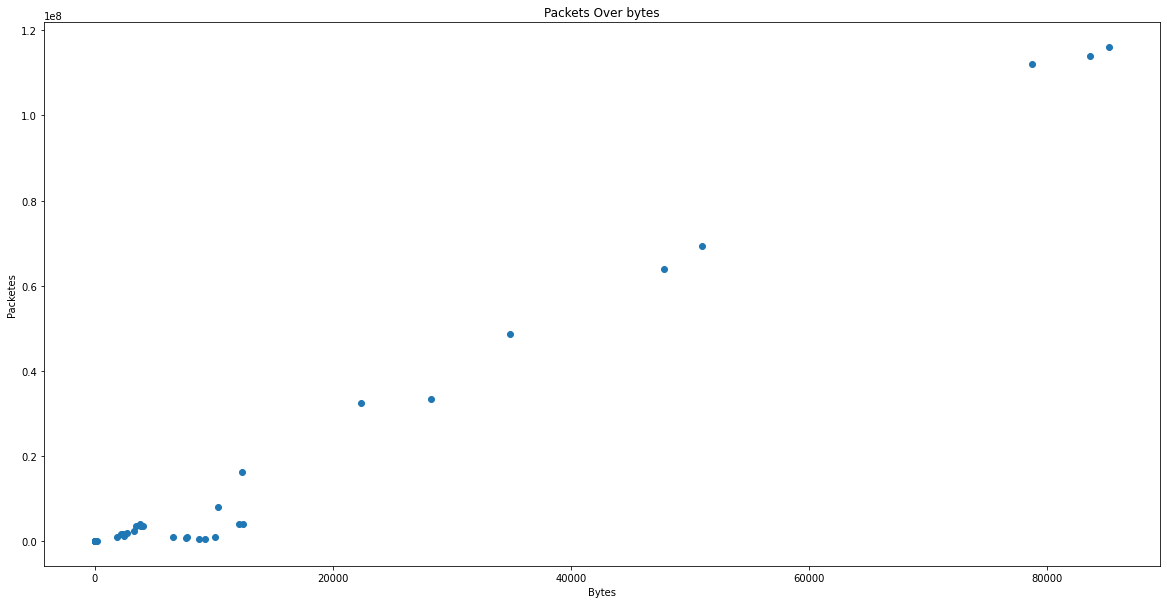

In [7]:
# Records Over Packets
plt.scatter(df["Packets"],df["Bytes"])
plt.xlabel("Bytes")
plt.ylabel("Packetes")
plt.title("Packets Over bytes")

## Graphs with linear Regretion

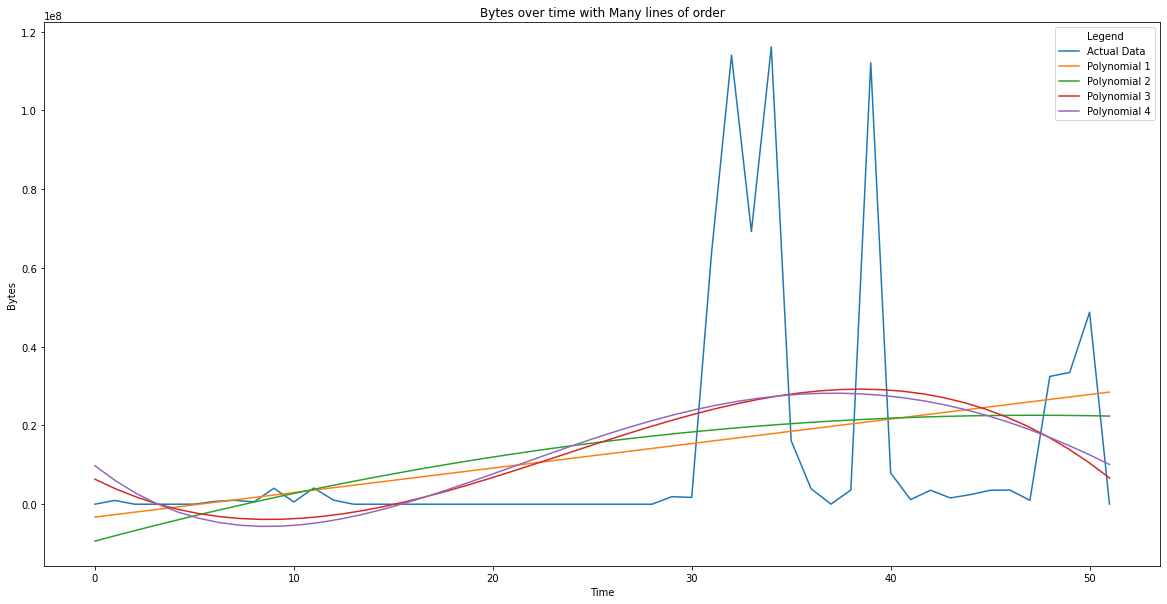

In [8]:
# Bytes Over Time
plt.plot(df_time,df["Bytes"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Bytes"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
#plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.title("Bytes over time with Many lines of order")
plt.legend(title="Legend")

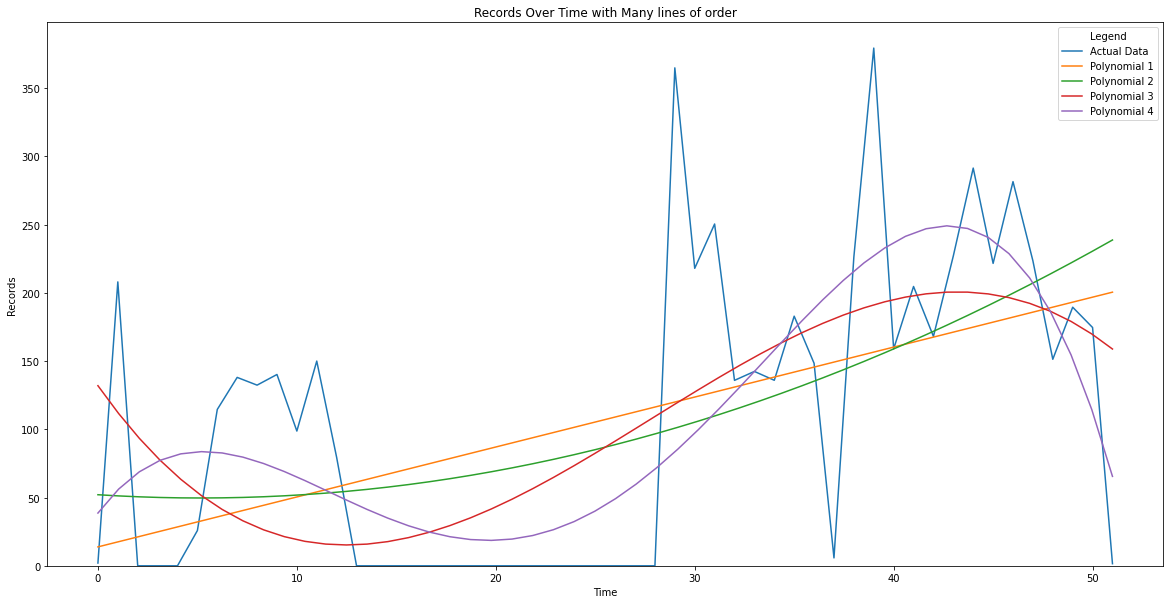

In [9]:
# Records over Time
plt.plot(df_time,df["Records"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Records"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Records')
plt.title("Records Over Time with Many lines of order")
plt.legend(title="Legend")

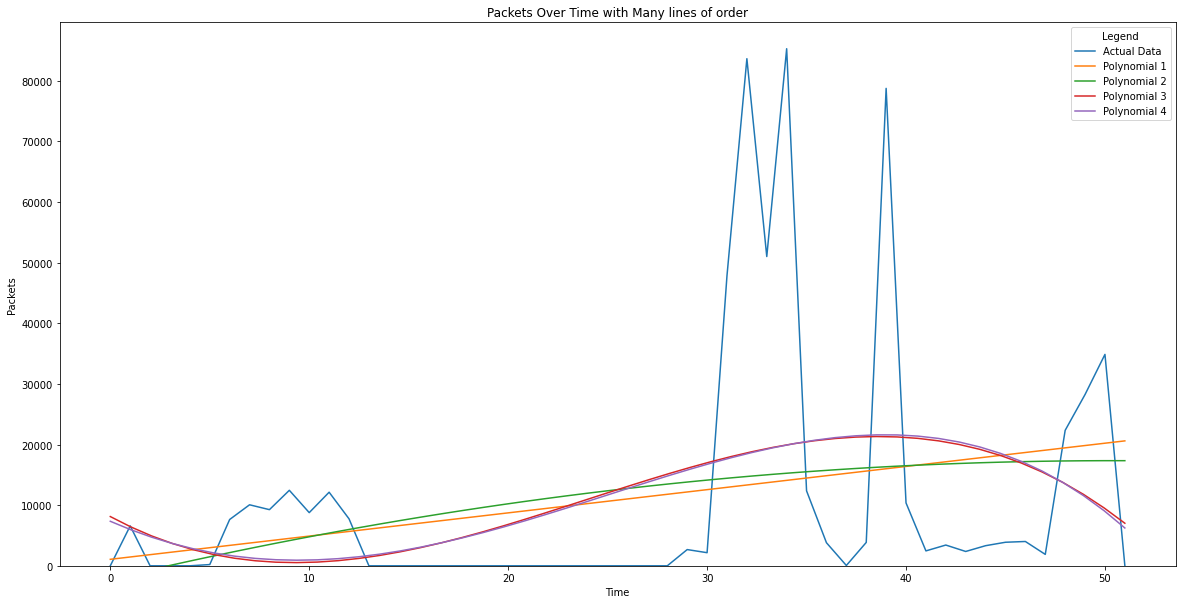

In [10]:
# Packets over Bytes
plt.plot(df_time,df["Packets"],label="Actual Data")
for i in range(1,5):
    poly = np.poly1d(np.polyfit(df_time,df["Packets"],i))
    new_x = np.linspace(df_time[0],df_time[-1])
    new_y = poly(new_x)
    plt.plot(new_x, new_y,label="Polynomial %i" %i)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Packets')
plt.title("Packets Over Time with Many lines of order")
plt.legend(title="Legend")

## Predictions
Now that we have made the visualisations we can start to make some predictions, We need to have to bits of infomation to ask for a prediciton. The only solid correlations we have found are:
-	Bytes over Time
-	Records over Time
-	Packets over Time
We can make predictions for all of them if we wanted too! I'm going to stick with trying to predict the bytes. This will need to take two perameters to make the prediction:
-   The time you want to predict how many bytes
-   How many records you expect to see
To be hoenst this isn't perfect as idealy you would just type the time in and bosh you have the bytes...but meh we could proberbly cheese it with Time and Time as an imput but 🤷‍

In [11]:
# Training Data
y_train = df[["Bytes"]][0:43:].to_numpy()
y_train = y_train.flatten()
x_train = list(range(0,len(y_train)))
#y_train = y_train.astype(int) # This removes all decimal points in the Bytes d
# Testing Data
y_test = df[["Bytes"]].to_numpy()[43::]
x_test = list(range(0,len(y_test)))

 Now that we have the data we can start to do some predictions, using scipy. 

In [12]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x_train, y_train)

Now we have the infomation about a line of best fit from scipy we can define a function to find the intercept point giving us the prediciton

In [13]:
def intercept_point(x):
    return slope*x+intercept

Using the data that we have seperated we can select a test value, we will say line 50

In [14]:
# Show the data that is on line 50
line50 = df.loc[[50]]
line50

,Date,Records,Bytes,Packets
50,2021/03/28T17:00:00,174.57,48726011.64,34856.72


In [15]:
# Make me a nice prediction
prediciton = intercept_point(50)
print(f"Predicion: {prediciton} Bytes at Timestamp 50")

Predicion: 41716905.185147986 Bytes at Timestamp 50


We can see that there is a bit of a difference there but lets see how much the difference is:

In [16]:
print(f"Prediction is {int(prediciton-line50['Bytes'])} off from the actual result")

Prediction is -7009106 off from the actual result


Clearly this is quite a big gap, to see what order scipy was using we can plot the data onto a graph:

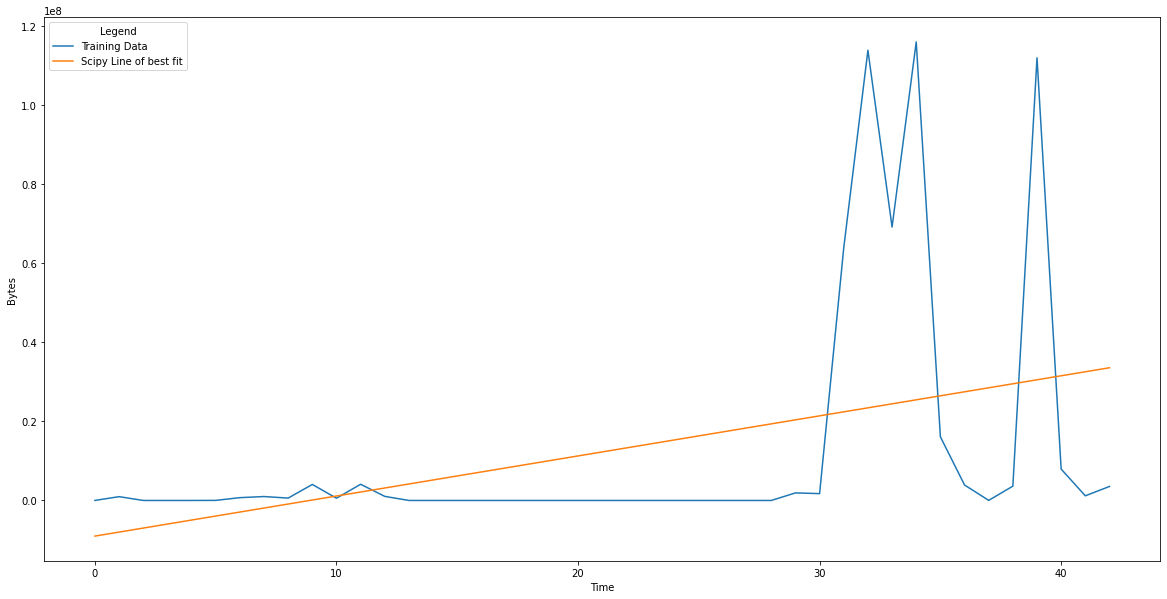

In [17]:
model = list(map(intercept_point, x_train))
plt.plot(x_train,y_train,label="Training Data")
plt.plot(x_train, model, label="Scipy Line of best fit")
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend(title="Legend")

Clearly it was using the first order equation. We said that the 4th looked like a better fit.\
https://www.w3schools.com/python/python_ml_linear_regression.asp